In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.svm import SVC, LinearSVC

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB


from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, cross_val_predict

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing Data Cleaning and Analysis
<!-- #### 1. Understanding meaning of each column: -->
<!-- <br>Data Dictionary: -->
<br>**Variable        Description**</br>
1. Survived	- Survived (1) or died (0)
2. Pclass -	Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. Name	- Passenger’s name
4. Sex -	Passenger’s sex
5. Age	- Passenger’s age
6. SibSp -	Number of siblings/spouses aboard
7. Parch -	Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
8. Ticket -	Ticket number
9. Fare -	Fare
10. Cabin -	Cabin
11. Embarked -	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
"""
Deleting the columns not required for determining the survival of a person
"""

del train['PassengerId']
del train['Ticket']
del train['Fare']
del train['Cabin']
del train['Name']


In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
train.shape

(891, 7)

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [9]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [10]:
"""Since there are ONLY 2 rows whose Embarked data is not known, 
therefore we can neglect those 2 rows as they will not make much of a difference"""


"""
Similarly, deleting the columns not required for determining the survival of a person for the data stored in test.csv
"""

del test['PassengerId']
del test['Ticket']
del test['Fare']
del test['Cabin']
del test['Name']

test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [11]:
test.describe()

,Pclass,Age,SibSp,Parch
count,418.000000,332.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344
std,0.841838,14.181209,0.896760,0.981429
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000
max,3.000000,76.000000,8.000000,9.000000


In [12]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [13]:
def getNum(str):
    if str=='male':
        return '1'
    if str=='female':
        return '2'
train["Gender"]=train["Sex"].apply(getNum)
#We have created a new column called "Gender" and 
#filling it with values 1 ,2 based on the values of sex column
train.head()

test["Gender"]=test["Sex"].apply(getNum)
#We have created a new column called "Gender" and 
#filling it with values 1 ,2 based on the values of sex column
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,3,male,34.5,0,0,Q,1
1,3,female,47.0,1,0,S,2
2,2,male,62.0,0,0,Q,1
3,3,male,27.0,0,0,S,1
4,3,female,22.0,1,1,S,2


In [14]:
del train['Sex']

In [15]:
del test['Sex']

In [16]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,2
2,1,3,26.0,0,0,S,2
3,1,1,35.0,1,0,S,2
4,0,3,35.0,0,0,S,1


In [17]:
test.head()

,Pclass,Age,SibSp,Parch,Embarked,Gender
0,3,34.5,0,0,Q,1
1,3,47.0,1,0,S,2
2,2,62.0,0,0,Q,1
3,3,27.0,0,0,S,1
4,3,22.0,1,1,S,2


In [18]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [19]:
train[['Gender','Survived']].groupby(['Gender']).mean().sort_values(by='Survived',ascending=True)

,Survived
Gender,
1,0.188908
2,0.742038


In [20]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=True)

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [21]:
train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=True)

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


## Analyzing Data by Visualization

Inorder to understand who would have had a better probability of survival, we should visualize the patients who survived based on age, passenger class and etc.


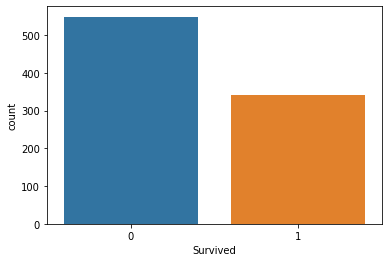

In [22]:
sns.countplot(train['Survived'])


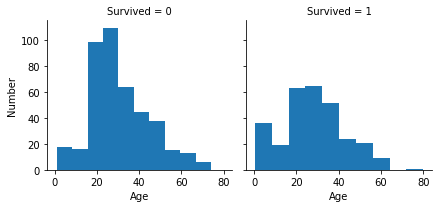

In [23]:
age_hist = sns.FacetGrid(train, col='Survived')
age_hist.map(plt.hist, 'Age')
age_hist.set_ylabels('Number')

Among those who didn't survive, most people were of the age 20-30 years whereas among those who survived, 
the number of infants are much higher than teenagers.

## Number of people who survived over age and passenger class


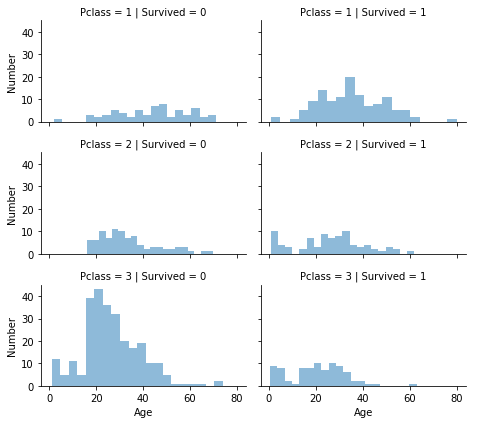

In [24]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.0, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

## Handling the NULL values in the column Age

#### We have NULL value inplace of Age for some of the people in both training and testing data.
#### So, one way is to fill them with the mean values i.e. fill the ones who have survived with the mean age of the survived people and similarly fill those who haven't survived with the mean age of all non-survived people.

#### But, this will only solve the problem for the training data and not for the testing data as we have to predict their survival status.

#### So, we can tackle the issue by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [25]:
#finding mean survived age
mean_sur= train[train.Survived==1]['Age'].mean()
mean_sur

28.343689655172415

In [26]:
# Finding the mean age of "Not Survived" people
mean_nsur=train[train['Survived']==0]['Age'].mean()
mean_nsur

30.62617924528302

In [27]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
    
train["Age"].isnull().sum()

0

In [28]:

#Renaming "gender" column
train.rename(columns={'Gender':'Sex'}, inplace=True)

test.rename(columns={'Gender':'Sex'}, inplace=True)

#Removing the 2 rows having null value for Embarked column
train.dropna(inplace=True)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22,1,0,S,1
1,1,1,38,1,0,C,2
2,1,3,26,0,0,S,2
3,1,1,35,1,0,S,2
4,0,3,35,0,0,S,1


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null int32
SibSp       889 non-null int64
Parch       889 non-null int64
Embarked    889 non-null object
Sex         889 non-null object
dtypes: int32(1), int64(4), object(2)
memory usage: 52.1+ KB


In [30]:
#Combining 'Parch' & 'SibSp' as 'Realtives'
train['Family_Members']=train['Parch']+train['SibSp'] + 1
test['Family_Members']=test['Parch']+test['SibSp'] + 1

del train['SibSp']
del train['Parch']

del test['SibSp']
del test['Parch']

In [31]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,22,S,1,2
1,1,1,38,C,2,2
2,1,3,26,S,2,1
3,1,1,35,S,2,2
4,0,3,35,S,1,1


In [32]:
test.head()

,Pclass,Age,Embarked,Sex,Family_Members
0,3,22,Q,1,1
1,3,38,S,2,2
2,2,26,Q,1,1
3,3,35,S,1,1
4,3,35,S,2,3


### Grouping the Age data

#### The age groups need to be converted into different sub-groups so that better prediction model can be formed

In [33]:
data=[train,test]

for dataset in data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 37), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45 , 'Age'] = 6

train['Age'].value_counts()

4    161
2    155
1    149
3    137
5    123
6    100
0     64
Name: Age, dtype: int64

In [34]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,S,1,2
1,1,1,5,C,2,2
2,1,3,3,S,2,1
3,1,1,4,S,2,2
4,0,3,4,S,1,1


In [35]:
test.head()

,Pclass,Age,Embarked,Sex,Family_Members
0,3,2,Q,1,1
1,3,5,S,2,2
2,2,3,Q,1,1
3,3,4,S,1,1
4,3,4,S,2,3


In [36]:
data=[train,test]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map({'C': 0, 'S': 1, 'Q': 2}).astype(int)
    
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1


In [37]:
train[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=True)

,Survived
Age,
5,0.325203
2,0.341935
3,0.350365
1,0.369128
6,0.370000
4,0.428571
0,0.593750


In [38]:
train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=True)

,Survived
Embarked,
1,0.336957
2,0.389610
0,0.553571


In [39]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.626168


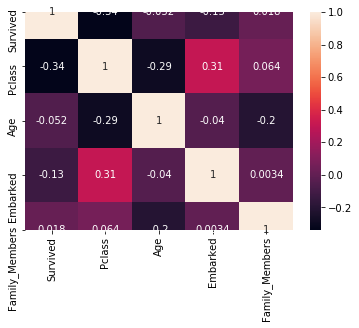

In [40]:
sns.heatmap(train.corr(), annot=True)

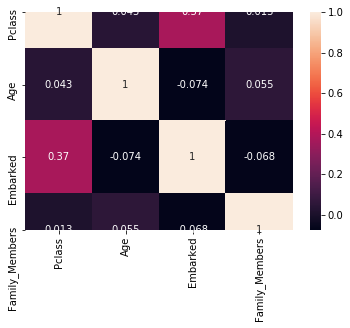

In [41]:
sns.heatmap(test.corr(), annot=True)

In [42]:
train


,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1
...,...,...,...,...,...,...
886,0,2,3,1,1,1
887,1,1,1,1,2,1
888,0,3,5,1,2,4
889,1,1,3,0,1,1


In [43]:
test

,Pclass,Age,Embarked,Sex,Family_Members
0,3,2,2,1,1
1,3,5,1,2,2
2,2,3,2,1,1
3,3,4,1,1,1
4,3,4,1,2,3
...,...,...,...,...,...
413,3,1,1,1,1
414,1,5,0,2,1
415,3,4,1,1,1
416,3,4,1,1,1


## Building Models for Prediction

#### Now we will train multiple Machine Learning algorithms over the training data to predict the survival on our testing data and analyze the results thus obtained.

#### We might also use use cross-validation in the end.

####  We know that since the survival is represented as either 0 or 1, therefore it is a Classification problem. The algorithms used for the same are:
##### Logistic Regression
##### Support Vector Machines
##### KNN or K-Nearest Neighbors
##### Decision Trees
##### Random Forest
##### Stochastic Gradient descent (SGD)
##### Gaussian Naive Bayes

In [44]:
X_train= train.drop(['Survived'], axis =1)
y_train= train['Survived']

X_test=test.copy()

## Logistic Regression

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 0]


In [46]:
round(np.mean(y_pred), 2)

0.38

In [47]:
# Checking accuracy of the linear regressor model

log_reg_acc = round(log_reg.score(X_train,y_train)*100, 2)
print(log_reg_acc,'%')

79.3 %


### We can find the correlation between the different features within the data inorder to analyze the survival of the people onboard.

In [48]:
df_coeff= pd.DataFrame(train.columns.delete(0))
df_coeff.columns = ['Feature']
df_coeff['Correlation'] = pd.Series(log_reg.coef_[0])

df_coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Sex,2.652974
4,Family_Members,-0.184480
2,Embarked,-0.196703
1,Age,-0.210836
0,Pclass,-1.042039


#### From this we can conclude that Females (Sex=2) have a higher probability of surviving.

## Cross-Validation
#### Cross-Validation protects against overfitting.
#### It is a resampling method which tells us how well our model would generalize to unseen data. This is achieved by fixing a number of partitions of the dataset called folds, predicting each fold separately, and averaging the predictions in the end.



In [49]:
# Set our robust cross-validation scheme!
kf = KFold(n_splits = 10, random_state = 2)

# Print CV accuracy estimate:
#print(cross_val_score(logisticRegression, X_test, y_test, cv = kf).mean())
scores= cross_val_score(log_reg, X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_log = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_log, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

y_pred= cross_val_predict(log_reg, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_pred),'\n')

print("Precision: ", round(precision_score(y_train, y_pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, y_pred)*100, 2), '%')

Scores:  [76.40449438 82.02247191 76.40449438 79.7752809  78.65168539 77.52808989
 78.65168539 75.28089888 82.02247191 80.68181818] %
Mean:  78.74233912155259 %
Standard Deviation:  2.2527878724751487 %

Confusion Matrix: 
 [[470  79]
 [110 230]] 

Precision:  74.43 %
Recall:  67.65 %
F1 Score:  70.88 %


### The first row is about the not-survived-predictions: 470 passengers were correctly classified as not survived (called true negatives) and 79 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 110 passengers where wrongly classified as survived (false negatives) and 230 where correctly classified as survived (true positives).

## Support Vector Machine (SVM)

In [50]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [51]:
round(np.mean(y_pred), 2)

0.36

In [52]:
# Checking accuracy of the support vector model

svc_acc = round(svc.score(X_train,y_train)*100, 2)
print(svc_acc,'%')

83.13 %


In [53]:
# Print CV accuracy estimate:
#print(cross_val_score(SVC(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(SVC(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_svc = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_svc, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

y_pred= cross_val_predict(svc, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_pred),'\n')

print("Precision: ", round(precision_score(y_train, y_pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, y_pred)*100, 2), '%')

Scores:  [78.65168539 86.51685393 78.65168539 84.26966292 82.02247191 82.02247191
 80.8988764  77.52808989 87.64044944 86.36363636] %
Mean:  82.45658835546476 %
Standard Deviation:  3.4345085056071674 %

Confusion Matrix: 
 [[493  56]
 [100 240]] 

Precision:  81.08 %
Recall:  70.59 %
F1 Score:  75.47 %


### The first row is about the not-survived-predictions: 493 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 100 passengers where wrongly classified as survived (false negatives) and 240 where correctly classified as survived (true positives).

## K-Nearest Neighbor (KNN)

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [55]:
round(np.mean(y_pred), 2)

0.34

In [56]:
# Checking accuracy of the knn model

knn_acc = round(knn.score(X_train,y_train)*100, 2)
print(knn_acc,'%')

84.25 %


In [57]:
# Print CV accuracy estimate:
#print(cross_val_score(KNeighborsClassifier(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_knn = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_knn, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

y_pred= cross_val_predict(knn, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_pred), '\n')

print("Precision: ", round(precision_score(y_train, y_pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, y_pred)*100, 2), '%')

Scores:  [73.03370787 79.7752809  75.28089888 85.39325843 84.26966292 79.7752809
 82.02247191 78.65168539 86.51685393 81.81818182] %
Mean:  80.65372829417771 %
Standard Deviation:  4.069733470091146 %

Confusion Matrix: 
 [[484  65]
 [107 233]] 

Precision:  78.19 %
Recall:  68.53 %
F1 Score:  73.04 %


### The first row is about the not-survived-predictions: 484 passengers were correctly classified as not survived (called true negatives) and 65 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 107 passengers where wrongly classified as survived (false negatives) and 233 where correctly classified as survived (true positives).

## Decision Trees

In [58]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [59]:
round(np.mean(y_pred), 2)

0.36

In [60]:
#Checking accuracy of Decision Tree model

tree_acc = round(tree.score(X_train, y_train)*100, 3)
print(tree_acc,'%')

87.064 %


In [61]:
# Print CV accuracy estimate:
#print(cross_val_score(DecisionTreeClassifier(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_tree = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_tree, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')



Scores:  [69.66292135 80.8988764  78.65168539 79.7752809  80.8988764  75.28089888
 77.52808989 75.28089888 86.51685393 78.40909091] %
Mean:  78.29034729315629 %
Standard Deviation:  4.2042957454540195 %



## Random Forest

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print(y_pred)


[0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [63]:
round(np.mean(y_pred),2 )

0.37

In [64]:
# Checking accuracy of the Random Forest Classifier

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 3)
print(acc_random_forest,'%')

87.064 %


In [65]:
# Print CV accuracy estimate:
#print(cross_val_score(RandomForestClassifier(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(RandomForestClassifier(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_ranfor = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_ranfor, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

y_pred= cross_val_predict(random_forest, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_pred), '\n')

print("Precision: ", round(precision_score(y_train, y_pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, y_pred)*100, 2), '%')

Scores:  [75.28089888 80.8988764  77.52808989 83.14606742 83.14606742 73.03370787
 76.40449438 76.40449438 86.51685393 80.68181818] %
Mean:  79.3041368743616 %
Standard Deviation:  4.018211889617046 %

Confusion Matrix: 
 [[479  70]
 [115 225]] 

Precision:  76.27 %
Recall:  66.18 %
F1 Score:  70.87 %


### The first row is about the not-survived-predictions: 479 passengers were correctly classified as not survived (called true negatives) and 70 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 115 passengers where wrongly classified as survived (false negatives) and 225 where correctly classified as survived (true positives).

## Stochastic Gradient Descent (SGD)

In [66]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0]


In [67]:
round(np.mean(y_pred), 2)

0.59

In [68]:
#Checking accuracy of the SGD model

sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd,'%')

70.08 %


In [69]:
# Print CV accuracy estimate:
#print(cross_val_score(SGDClassifier(max_iter=5, tol=None), X_test, y_test, cv = kf).mean())

scores= cross_val_score(SGDClassifier(max_iter=5, tol=None), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_sgd = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_sgd, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

y_pred= cross_val_predict(sgd, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_pred), '\n')

print("Precision: ", round(precision_score(y_train, y_pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, y_pred)*100, 2), '%')

Scores:  [71.91011236 58.42696629 75.28089888 67.41573034 68.53932584 68.53932584
 75.28089888 73.03370787 78.65168539 75.        ] %
Mean:  71.20786516853933 %
Standard Deviation:  5.465991885237633 %

Confusion Matrix: 
 [[389 160]
 [116 224]] 

Precision:  58.33 %
Recall:  65.88 %
F1 Score:  61.88 %


### The first row is about the not-survived-predictions: 389 passengers were correctly classified as not survived (called true negatives) and 160 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 116 passengers where wrongly classified as survived (false negatives) and 224 where correctly classified as survived (true positives).

## Gaussian Naive Bayes

In [70]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)
print(y_pred)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [71]:
round(np.mean(y_pred), 2)

0.42

In [72]:
#Checking accuracy for the Gaussian Naive Bayes model

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian,'%')

79.98 %


In [73]:
# Print CV accuracy estimate:
#print(cross_val_score(GaussianNB() , X_test, y_test, cv = kf).mean())

scores= cross_val_score(GaussianNB() , X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_gau = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_gau, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

#Confusion Matrix
y_pred= cross_val_predict(gaussian, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_pred), '\n')

print("Precision: ", round(precision_score(y_train, y_pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, y_pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, y_pred)*100, 2), '%')

Scores:  [75.28089888 77.52808989 77.52808989 82.02247191 77.52808989 78.65168539
 79.7752809  80.8988764  82.02247191 81.81818182] %
Mean:  79.30541368743617 %
Standard Deviation:  2.2347132453972596 %

Confusion Matrix: 
 [[463  86]
 [ 98 242]] 

Precision:  73.78 %
Recall:  71.18 %
F1 Score:  72.46 %


### The first row is about the not-survived-predictions: 463 passengers were correctly classified as not survived (called true negatives) and 86 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 98 passengers where wrongly classified as survived (false negatives) and 242 where correctly classified as survived (true positives).

## Finding the Best Model

In [74]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',  
              'Decision Tree','Random Forest',
              'Stochastic Gradient Decent', 
              'Gaussian Naive Bayes'],
    'Score': [log_reg_acc, svc_acc, knn_acc,  
              tree_acc, acc_random_forest, acc_sgd,
              acc_gaussian],
    'Mean Score': [mean_acc_log, mean_acc_svc, mean_acc_knn,
                   mean_acc_tree, mean_acc_ranfor, 
                   mean_acc_sgd, mean_acc_gau]})
df_result = results.sort_values(by='Mean Score', ascending=False)
df_result = df_result.set_index('Model')
df_result

,Score,Mean Score
Model,,
Support Vector Machines,83.130,82.456588
KNN,84.250,80.653728
Gaussian Naive Bayes,79.980,79.305414
Random Forest,87.064,79.304137
Logistic Regression,79.300,78.742339
Decision Tree,87.064,78.290347
Stochastic Gradient Decent,70.080,71.207865


###  As we can see, the Decision Tree Classifer & Random Forest Classifier coincidently outputs an equal amount of 86.95% accuracy on the test set and are both the most successful models for the set of features and the model that we have built.
### But, we also know that just calculating the accuracy without cross-validating could result in Overfitting that we can easily see in our models. So, after performing cross-validation, we find out the mean accuracy of each of the model which correctly identifies Support Vector Machines (SVC) as the best model with an accuracy of 82.34% for the given dataset.

                Importance
Features                  
Sex                  0.409
Age                  0.194
Pclass               0.172
Family_Members       0.163
Embarked             0.061


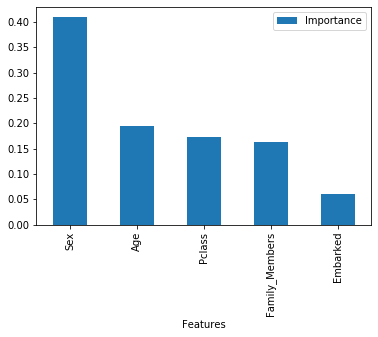

In [75]:
importances=pd.DataFrame({'Features': X_train.columns, 'Importance':np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
print(importances.head())
importances.plot.bar()

                Importance
Features                  
Sex                  0.477
Family_Members       0.177
Pclass               0.171
Age                  0.144
Embarked             0.031


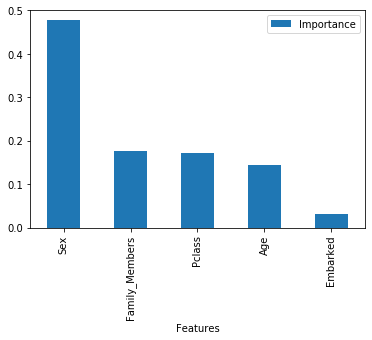

In [76]:
importances=pd.DataFrame({'Features': X_train.columns, 'Importance':np.round(tree.feature_importances_, 3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
print(importances.head())
importances.plot.bar()

In [77]:
test

,Pclass,Age,Embarked,Sex,Family_Members
0,3,2,2,1,1
1,3,5,1,2,2
2,2,3,2,1,1
3,3,4,1,1,1
4,3,4,1,2,3
...,...,...,...,...,...
413,3,1,1,1,1
414,1,5,0,2,1
415,3,4,1,1,1
416,3,4,1,1,1
